In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split


In [2]:
import plotly.figure_factory as ff
import re
import string
from collections import Counter
import plotly.express as px
import spacy

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re

In [4]:
df_train = pd.read_csv('/kaggle/input/data-cnn/train.csv')
df_test = pd.read_csv('/kaggle/input/data-cnn/test.csv')
print(df_train.shape)
print(df_test.shape)

(27481, 4)
(3534, 3)


In [5]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


# Data processing

In [7]:
df_train

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


## Text

In [8]:
df_train['text']=df_train['text'].str.lower()

In [9]:
# Remove all urls
urls = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
df_train['text']=df_train['text'].map(lambda char:re.sub(urls, "", char))

In [10]:
# Remove all numbers
df_train['text']=df_train['text'].map(lambda s:''.join([i for i in s if not i.isdigit()]))

In [11]:
df_train['text']=df_train['text'].map(lambda char:re.sub(r'^\s*|\s\s*', ' ', char).strip())

In [12]:
# Remove all Punc.
df_train['text']=df_train['text'].str.replace(r'[^\w\s]+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [13]:
# Remove special char
df_train['text']= df_train['text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [14]:
import unicodedata
df_train['text']= df_train['text'].map(lambda char:unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

## Selected Text

In [15]:
df_train['selected_text']=df_train['selected_text'].str.lower()
# Remove all urls
urls = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
df_train['selected_text']=df_train['selected_text'].map(lambda char:re.sub(urls, "", char))
# Remove all numbers
df_train['selected_text']=df_train['selected_text'].map(lambda s:''.join([i for i in s if not i.isdigit()]))
df_train['selected_text']=df_train['selected_text'].map(lambda char:re.sub(r'^\s*|\s\s*', ' ', char).strip())
# Remove all Punc.
df_train['selected_text']=df_train['selected_text'].str.replace(r'[^\w\s]+', '')
# Remove special char
df_train['selected_text']= df_train['selected_text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
df_train['selected_text']= df_train['selected_text'].map(lambda char:unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [16]:
'''from autocorrect import Speller
spell = Speller(lang="en")
tokenizer = RegexpTokenizer(r'\w+')

df_train.text = df_train.text.map(lambda x:tokenizer.tokenize(x))  #remove punctuation and tokenize
df_train.text = df_train.text.map(lambda x:[spell(i) for i in x])  #spell check'''

'from autocorrect import Speller\nspell = Speller(lang="en")\ntokenizer = RegexpTokenizer(r\'\\w+\')\n\ndf_train.text = df_train.text.map(lambda x:tokenizer.tokenize(x))  #remove punctuation and tokenize\ndf_train.text = df_train.text.map(lambda x:[spell(i) for i in x])  #spell check'

In [17]:
df_train

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rele...,sons of,negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on denver husband los...,d lost,negative
27477,4f4c4fc327,ive wondered about rake to the client has made...,dont force,negative
27478,f67aae2310,yay good for both of you enjoy the break you ...,yay good for both of you,positive
27479,ed167662a5,but it was worth it,but it was worth it,positive


# Models

In [18]:
import gensim
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from tensorflow.keras.utils import to_categorical
import keras
from time import time
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [19]:
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras import layers
from sklearn.metrics import accuracy_score, f1_score


In [20]:
# Text
df = df_train
df['text'] = df['text'].map(lambda x:str(x))
df['sentiment'] = df_train['sentiment'].astype("category")
df['sentiment'] = df_train['sentiment'].cat.codes
# df

In [21]:
df_test

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [22]:
x_train, x_test, y_train, y_test = train_test_split(df['text'].values, df['sentiment'].values,stratify=df['sentiment'].values, test_size=0.3,random_state=1)
y_train = to_categorical(y_train)

# x_test, x_val , y_test, y_val = train_test_split(x_test, y_test,stratify=y_test, test_size=0.5,random_state=1)
x_val = x_test[0:4122]
y_val = to_categorical(y_test[0:4122])
x_test = x_test[4122:]
y_test = y_test[4122:]

print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))
print("X_val shape  : {}".format(x_val.shape))
print("y val shape  : {}".format(y_val.shape))


X_train shape: (19236,)
y_train shape: (19236, 3)
X_test shape : (4122,)
y_test shape : (4122,)
X_val shape  : (4122,)
y val shape  : (4122, 3)


### Tokenized data
Our input data is text and we can't feed it directly to our models. So, we'll define a Tokenizer to convert our text input data into token indices. This means that every token (we can decide what a token is char, word, sub-word, etc.) is mapped to a unique index which allows us to represent our text as an array of indices.

In [23]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df.text.values)

X_train = tokenizer.texts_to_sequences(x_train)
X_val = tokenizer.texts_to_sequences(x_val)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

#  All sequences in a list have the same length no more than 100
X_train = pad_sequences(X_train, padding='pre', maxlen=maxlen) 
X_val = pad_sequences(X_val, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='pre', maxlen=maxlen)

word_index = tokenizer.word_index

In [24]:
activation = ["tanh", "selu", "elu" ]
optimizer = ["adam", "SGD", "RMSprop", "Adadelta"]
epochs = [5,10,15,20]
batchsize = [8,16,32,64,128]

In [25]:
def rnn(activation,optimizer,epochs,batchsize):


    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length))
    model.add(layers.SimpleRNN(32)) ## 16, 32, 64, 128
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_data=(X_val, y_val), batch_size=batchsize)
  
    return history, model
     
     

2022-12-25 16:58:46.714502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 16:58:46.715818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 16:58:46.716501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 16:58:46.717306: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

129/129 [==============================] - 1s 9ms/step - loss: 0.9195 - accuracy: 0.6674
best activation function is  elu
129/129 [==============================] - 1s 8ms/step - loss: 1.0834 - accuracy: 0.4037
best optimizer is  adam
129/129 [==============================] - 1s 8ms/step - loss: 2.4461 - accuracy: 0.6024
best epoch is  10
129/129 [==============================] - 1s 8ms/step - loss: 1.9680 - accuracy: 0.5983
best batchsize is  16
test accuracy score =  0.6132945172246482
time taken is  1100.7057538032532


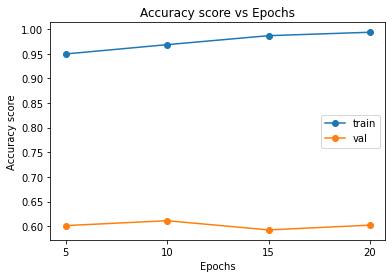

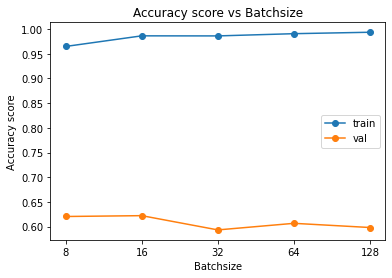

In [26]:
def select_hyperparameters():
    """
    function to select the best activation function, optimizer, epochs, and batch size
    """
    # dictionary to store the validation accuracy of different activation functions
    sel_activation = {}
    # iterate over different activation functions
    for i in activation:
        # build and train the model with current activation function
        history, model = rnn(i, "adam", 5, 16)
        # evaluate the model on the validation data
        val_acc = {i:model.evaluate(X_val,y_val)[1]}
        sel_activation.update(val_acc )
        keras.backend.clear_session()
    # select the best activation function 
    sel_activation_final = max(sel_activation, key=sel_activation.get)
    print("best activation function is ",sel_activation_final)
    # dictionary to store the validation accuracy of different optimizers
    sel_optimizer = {}
    for i in optimizer:# iterate over different optimizers
        # build and train the model with the current optimizer
        history, model = rnn(sel_activation_final,i,5,16)
        # evaluate the model on the validation data
        val_acc  = {i:model.evaluate(X_val,y_val)[1]}
        sel_optimizer.update(val_acc)
        keras.backend.clear_session()
    # select the best optimizer
    sel_optimizer_final = max(sel_optimizer, key=sel_optimizer.get)
    print("best optimizer is ",sel_optimizer_final)

    acc_train_epoch = {}
    acc_val_epoch = {}
    for i in epochs:# iterate over different number of epochs
        history, model = rnn(sel_activation_final,sel_optimizer_final,i,16)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_epoch.update(temp_train)
        acc_val_epoch.update(temp_val)
        keras.backend.clear_session()
    # select the best number of epochs
    sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
    print("best epoch is ",sel_epoch_final)

    acc_train_batch = {}
    acc_val_batch = {}
    for i in batchsize:
        history, model = rnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,i)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_batch.update(temp_train)
        acc_val_batch.update(temp_val)
        keras.backend.clear_session()
    # select the best batch size
    sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
    print("best batchsize is ",sel_batch_final)

    df_batch_train = pd.DataFrame(list(acc_train_batch.items()), columns=['Batchsize', 'Accuracy score'])
    df_batch_val = pd.DataFrame(list(acc_val_batch.items()), columns=['Batchsize', 'Accuracy score'])

    df_batch_val.Batchsize = df_batch_val.Batchsize.map(lambda x:str(x))
    df_batch_train.Batchsize = df_batch_train.Batchsize.map(lambda x:str(x))

    plt.figure()
    plt.plot(df_batch_train.iloc[:,0],df_batch_train.iloc[:,1],label="train", marker='o')
    plt.plot(df_batch_val.iloc[:,0],df_batch_val.iloc[:,1],label = "val", marker='o')
    plt.title("Accuracy score vs Batch size")
    plt.ylabel("Accuracy score")
    plt.xlabel("Batch size")
    plt.legend()

    #final model
    final_model, final_history = rnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,sel_batch_final)



# 5. best model
t0 = time()
select_hyperparameters()
pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
t1 = time()
print("time taken is ", t1-t0)

In [27]:
# selected_text
df = df_train
df['text'] = df['selected_text'].map(lambda x:str(x))
df['sentiment'] = df_train['sentiment'].astype("category")
df['sentiment'] = df_train['sentiment'].cat.codes

129/129 [==============================] - 1s 10ms/step - loss: 1.3101 - accuracy: 0.6349
best activation function is  tanh
129/129 [==============================] - 1s 9ms/step - loss: 1.0852 - accuracy: 0.3964
best optimizer is  RMSprop
129/129 [==============================] - 1s 11ms/step - loss: 2.0336 - accuracy: 0.5694
best epoch is  5
129/129 [==============================] - 1s 10ms/step - loss: 1.0685 - accuracy: 0.6184
best batchsize is  8
test accuracy score =  0.6579330422125182
time taken is  1127.5404117107391


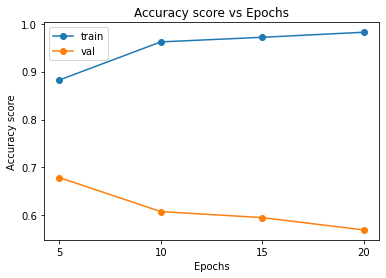

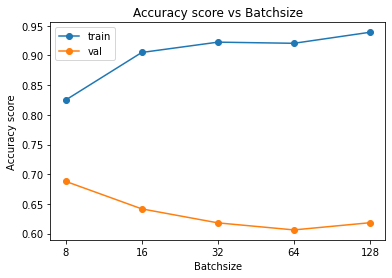

In [28]:
def select_hyperparameters():
    """
    function to select the best activation function, optimizer, epochs, and batch size
    """
    # dictionary to store the validation accuracy of different activation functions
    sel_activation = {}
    # iterate over different activation functions
    for i in activation:
        # build and train the model with current activation function
        history, model = rnn(i, "adam", 5, 16)
        # evaluate the model on the validation data
        val_acc = {i:model.evaluate(X_val,y_val)[1]}
        sel_activation.update(val_acc )
        keras.backend.clear_session()
    # select the best activation function 
    sel_activation_final = max(sel_activation, key=sel_activation.get)
    print("best activation function is ",sel_activation_final)
    # dictionary to store the validation accuracy of different optimizers
    sel_optimizer = {}
    for i in optimizer:# iterate over different optimizers
        # build and train the model with the current optimizer
        history, model = rnn(sel_activation_final,i,5,16)
        # evaluate the model on the validation data
        val_acc  = {i:model.evaluate(X_val,y_val)[1]}
        sel_optimizer.update(val_acc)
        keras.backend.clear_session()
    # select the best optimizer
    sel_optimizer_final = max(sel_optimizer, key=sel_optimizer.get)
    print("best optimizer is ",sel_optimizer_final)

    acc_train_epoch = {}
    acc_val_epoch = {}
    for i in epochs:# iterate over different number of epochs
        history, model = rnn(sel_activation_final,sel_optimizer_final,i,16)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_epoch.update(temp_train)
        acc_val_epoch.update(temp_val)
        keras.backend.clear_session()
    # select the best number of epochs
    sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
    print("best epoch is ",sel_epoch_final)

    acc_train_batch = {}
    acc_val_batch = {}
    for i in batchsize:
        history, model = rnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,i)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_batch.update(temp_train)
        acc_val_batch.update(temp_val)
        keras.backend.clear_session()
    # select the best batch size
    sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
    print("best batchsize is ",sel_batch_final)

    df_batch_train = pd.DataFrame(list(acc_train_batch.items()), columns=['Batchsize', 'Accuracy score'])
    df_batch_val = pd.DataFrame(list(acc_val_batch.items()), columns=['Batchsize', 'Accuracy score'])

    df_batch_val.Batchsize = df_batch_val.Batchsize.map(lambda x:str(x))
    df_batch_train.Batchsize = df_batch_train.Batchsize.map(lambda x:str(x))

    plt.figure()
    plt.plot(df_batch_train.iloc[:,0],df_batch_train.iloc[:,1],label="train", marker='o')
    plt.plot(df_batch_val.iloc[:,0],df_batch_val.iloc[:,1],label = "val", marker='o')
    plt.title("Accuracy score vs Batch size")
    plt.ylabel("Accuracy score")
    plt.xlabel("Batch size")
    plt.legend()

    #final model
    final_model, final_history = rnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,sel_batch_final)



# 5. best model
t0 = time()
select_hyperparameters()
pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
t1 = time()
print("time taken is ", t1-t0)